In [1]:
import pandas as pd

In [2]:
# Memuat data
data = pd.read_csv('SaaS-Sales.csv')

In [3]:
data

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [4]:
# Melihat info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

### Data Cleaning

In [5]:
# Mengecek nilai yang kosong
data.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
# data = data.dropna() -> Tidak perlu karena tidak ada data dengan nilai kosong

Tidak mencari outliers karena untuk menganalisis dampak dari diskon, semua data relevan untuk mencari tahu dan menjelaskan hubungan antara data discount, sales, profit

### Analisis

- Analisis statistika deskriptif dilakukan untuk memberikan gambaran umum tentang distribusi data, seperti rata-rata, median, standar deviasi, dan rentang di tabel di bawah ini.
- Ini membantu dalam memahami karakteristik dasar dari data sebelum melakukan analisis lebih mendalam.
- Seperti mengetahui rata-rata diskon, penjualan, dan profit, sehingga dapat memahami tren umum dalam dataset.

In [7]:
# Analisi Deskriptif

# Hitung statistik deskriptif untuk variabel berhubungan kuat dengan Discount yaitu Sales dan Profit.
data[['Discount', 'Sales', 'Profit']].describe()

,Discount,Sales,Profit
count,9994.000000,9994.000000,9994.000000
mean,0.156203,229.858001,28.656896
std,0.206452,623.245101,234.260108
min,0.000000,0.444000,-6599.978000
25%,0.000000,17.280000,1.728750
50%,0.200000,54.490000,8.666500
75%,0.200000,209.940000,29.364000
max,0.800000,22638.480000,8399.976000


In [8]:
# Analisis kolerasi untuk menentukan korelasi antara Discount dan variabel lain seperti Sales dan Profit

correlation = data[['Discount', 'Sales', 'Profit']].corr()
print("Correlation between Discount, Sales, dan Profit:")
correlation

Correlation between Discount, Sales, dan Profit:


,Discount,Sales,Profit
Discount,1.000000,-0.028190,-0.219487
Sales,-0.028190,1.000000,0.479064
Profit,-0.219487,0.479064,1.000000


Analisis korelasi ini memberikan gambaran tentang sejauh mana diskon (Discount) berkorelasi dengan Sales dan Profit. Korelasi ini menunjukkan apakah ada hubungan linear antara diskon dan variabel lainnya. Namun, korelasi saja tidak cukup untuk menentukan pengaruh sebab-akibat.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

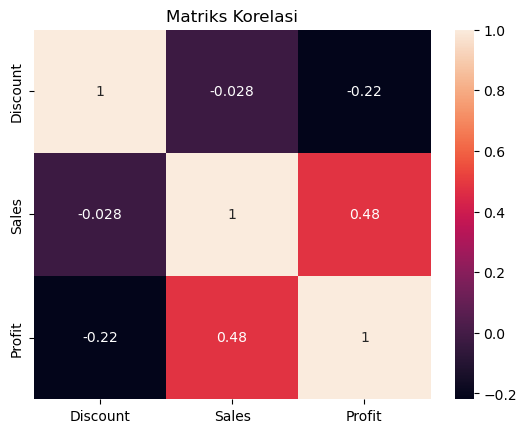

In [10]:
# Matriks Kolerasi
correlation_matrix = data[['Discount', 'Sales', 'Profit']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriks Korelasi')
plt.savefig('Grafik/matriks_kolerasi.png')
plt.show()

Heatmap dari matriks korelasi membantu visualisasi hubungan tersebut.

Interpretasi Korelasi:

- Discount dan Sales: Kolerasi antara Discount dan Sales adalah -0.028, menandakan hubungan negatif yang lemah. Artinya, ketika Discount meningkat, Sales cenderung sedikit menurun.
- Maksudnya dari hasil Discount dan Sales: Hubungan negatif yang lemah antara Discount dan Sales mungkin menunjukkan bahwa Discount tidak memiliki pengaruh besar pada Sales. Kemungkinan, faktor lain seperti kualitas produk, layanan pelanggan, atau strategi pemasaran lebih berperan dalam meningkatkan Sales.

- Discount dan Profit: Kolerasi antara Discount dan Profit adalah -0.22, menunjukkan hubungan negatif yang moderat. Hal ini berarti ketika Discount meningkat, Profit cenderung lebih menurun.
- Maksudnya dari hasil Discount dan Profit: Hubungan negatif yang moderat antara Discount dan Profit menunjukkan bahwa Discount dapat berdampak negatif pada Profit. Hal ini perlu dipertimbangkan saat menentukan strategi Discount agar tidak terlalu menggerus keuntungan.

- Sales dan Profit: Kolerasi antara Sales dan Profit adalah 0.48, menunjukkan hubungan positif yang moderat. Artinya, ketika Sales meningkat, Profit juga cenderung meningkat.
- Maksudnya dari hasil Sales dan Profit: Hubungan positif yang moderat antara Sales dan Profit menunjukkan bahwa peningkatan Sales secara umum mengarah pada peningkatan Profit. Hal ini mendukung fokus pada strategi yang meningkatkan Sales untuk mencapai Profit yang lebih besar.

Ini hanya analisis awal, untuk lebih detailnya akan dicoba menggunakan scatterplot dan regresi di bawah ini

Pairplot
- Tujuannya untuk menampilkan hubungan antara ketiga variabel utama dalam satu grafik.
- Grafik ini menunjukkan scatter plots dari pasangan variabel (Discount, Sales, Profit) dan histogram untuk distribusi masing-masing variabel. Ini membantu kita melihat pola umum dan hubungan antara variabel-variabel tersebut.

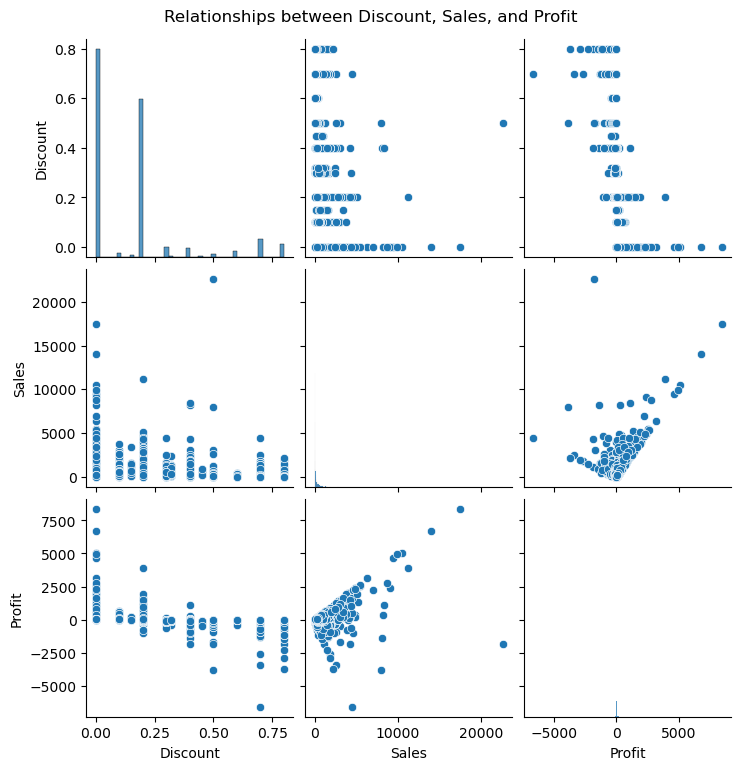

In [11]:
# Visualisasi hubungan antara Discount, Sales, dan Profit (Pairplot)
sns.pairplot(data[['Discount', 'Sales', 'Profit']])
plt.suptitle('Relationships between Discount, Sales, and Profit', y=1.02)
plt.savefig('Grafik/pairplot_discount_sales_profit.png')
plt.show()

Berikut scatter plot untuk melihat grafik yang lebih jelasnya dari pairplot sebelumnya

Scatter Plot (Diskon vs Profit)
- Tujuannya untuk menampilkan hubungan langsung antara diskon dan profit
- Grafik ini menunjukkan bagaimana profit berubah seiring dengan perubahan diskon. Titik-titik data di plot ini mengindikasikan adanya hubungan antara dua variabel tersebut.

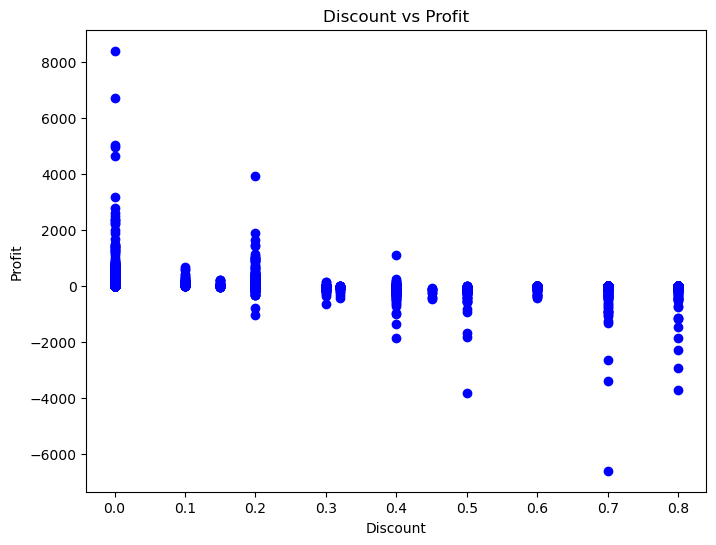

In [12]:
# Scatter plot Discount vs Profit
plt.figure(figsize=(8, 6))
plt.scatter(data['Discount'], data['Profit'], color='blue')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.savefig('Grafik/scatter_discount_profit.png')
plt.show()

Scatter Plot (Sales vs Profit)
- Tujuannya untuk menampilkan hubungan langsung antara penjualan dan profit.
- Grafik ini menunjukkan bagaimana profit berubah seiring dengan perubahan penjualan. Ini membantu kita memahami apakah peningkatan penjualan (mungkin karena diskon) berkontribusi positif terhadap profitabilitas.

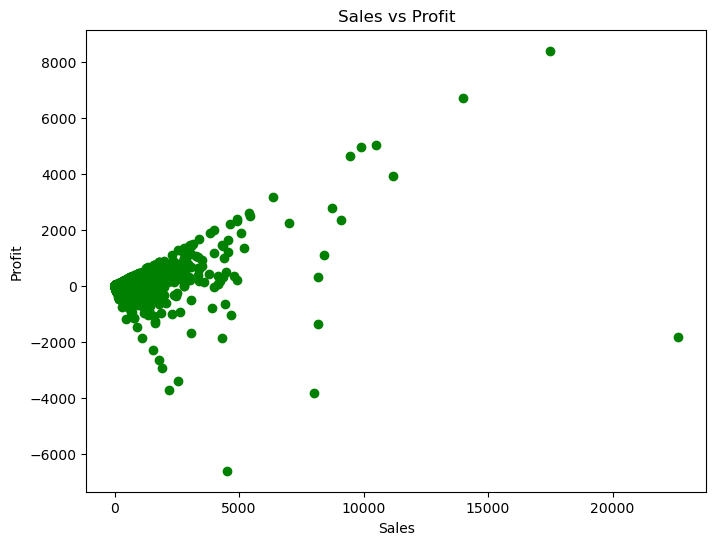

In [13]:
# Scatter plot Sales vs Profit
plt.figure(figsize=(8, 6))
plt.scatter(data['Sales'], data['Profit'], color='green')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.savefig('Grafik/scatter_sales_profit.png')
plt.show()

Scatter Plot (Discount vs Sale)
- Tujuannya untuk menampilkan hubungan langsung antara discount dan sales.
- Grafik memahami bagaimana perubahan dalam diskon mempengaruhi penjualan. Grafik ini membantu dalam mengidentifikasi pola, tren, dan hubungan antara dua variabel tersebut.

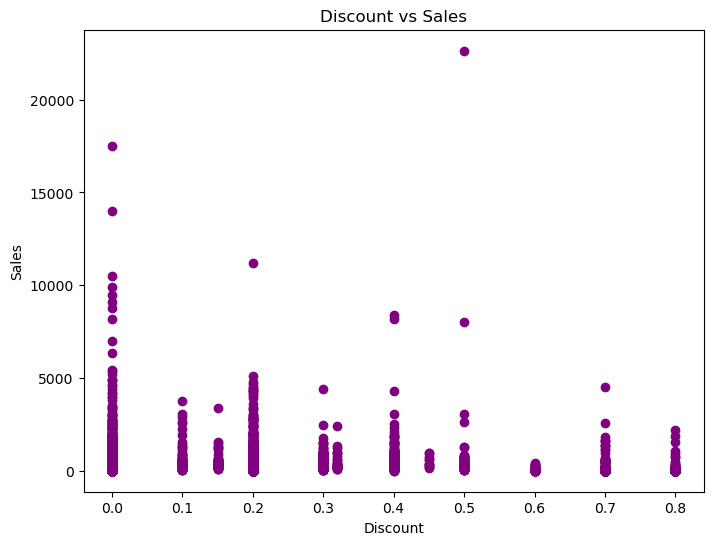

In [19]:
# Scatter plot Discount vs Sales
plt.figure(figsize=(8, 6))
plt.scatter(data['Discount'], data['Sales'], color='purple')
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.savefig('Grafik/scatter_discount_sales.png')
plt.show()

Analisis regresi linear ini digunakan untuk memprediksi profit berdasarkan diskon dan penjualan. Koefisien regresi menunjukkan seberapa besar perubahan profit jika diskon atau penjualan berubah.

In [14]:
# Analisis Regresi

from sklearn.linear_model import LinearRegression

# Analisis regresi linier untuk Profit berdasarkan Discount dan Sales
X = data[['Discount', 'Sales']]
y = data['Profit']

In [15]:
model = LinearRegression()
model.fit(X, y)

# Koefisien regresi
print(f'Koefisien: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Koefisien: [-2.33913374e+02  1.77882365e-01]
Intercept: 24.307117315886515


In [16]:
# Prediksi dan visualisasi regresi
data['Profit_Predicted'] = model.predict(X)

Grafik Regresi (Diskon vs Profit):
- Tujuannya untuk Menampilkan hubungan regresi antara diskon dan profit.
- Grafik ini menunjukkan garis regresi yang menggambarkan hubungan linier antara diskon dan profit. Titik-titik biru menunjukkan profit aktual, sedangkan titik-titik merah menunjukkan profit yang diprediksi oleh model regresi.

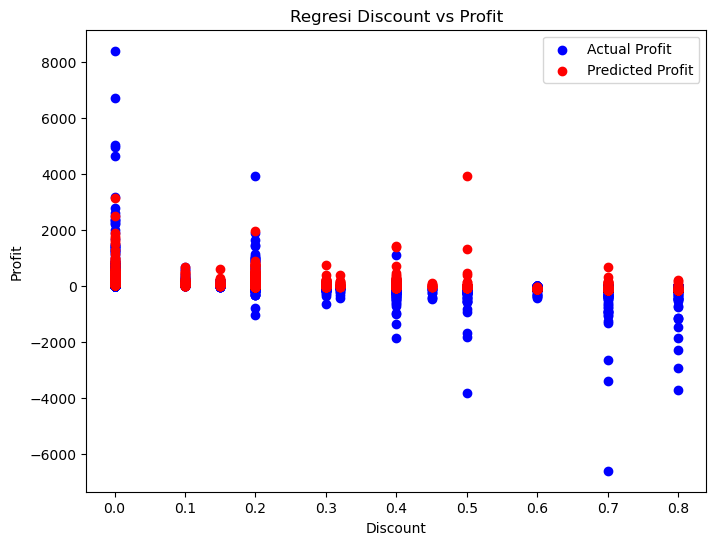

In [17]:
# Scatter plot Discount vs Profit dengan garis regresi
plt.figure(figsize=(8, 6))
plt.scatter(data['Discount'], data['Profit'], color='blue', label='Actual Profit')
plt.scatter(data['Discount'], data['Profit_Predicted'], color='red', label='Predicted Profit')
plt.title('Regresi Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend()
plt.savefig('Grafik/regresi_discount_profit.png')
plt.show()

Grafik Regresi (Sales vs Profit):
- Tujuannya untuk menampilkan hubungan regresi antara penjualan dan profit.
- Grafik ini menunjukkan garis regresi yang menggambarkan hubungan linier antara penjualan dan profit. Titik-titik hijau menunjukkan profit aktual, sedangkan titik-titik merah menunjukkan profit yang diprediksi oleh model regresi.

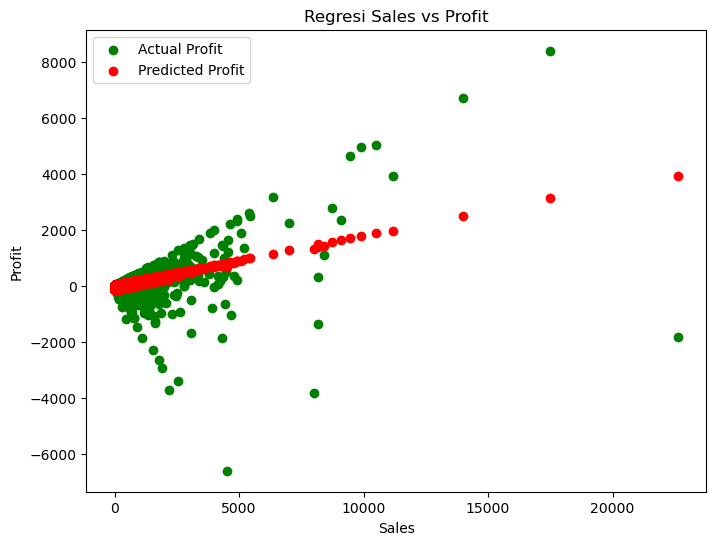

In [18]:
# Scatter plot Sales vs Profit dengan garis regresi
plt.figure(figsize=(8, 6))
plt.scatter(data['Sales'], data['Profit'], color='green', label='Actual Profit')
plt.scatter(data['Sales'], data['Profit_Predicted'], color='red', label='Predicted Profit')
plt.title('Regresi Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.savefig('Grafik/regresi_discount_profit.png')
plt.show()

In [20]:
# Simpan data yang diolah ke file CSV
data.to_csv('SaaS-Sales-Processed.csv', index=False)